Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array

#dl libraraies
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

# specifically for cnn
from tensorflow.keras.layers import Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

images = []
labels = []
img_hght=240
img_wdth=320
Daisy='./flowers/daisy'
Sunflower='./flowers/sunflower'
Tulip='./flowers/tulip'
Dandelion='./flowers/dandelion'
Rose='./flowers/rose'

In [2]:
images = []
labels = []
flowers = ['./flowers/daisy','./flowers/sunflower','./flowers/tulip','./flowers/dandelion','./flowers/rose']
fl_names = ['Daisy','Sunflower','Tulip','Dandelion','Rose']

In [3]:
def prep_data(fl_name,flowers):
    for img in os.listdir(flowers):
        path = os.path.join(flowers,img)
        img = cv2.imread(path,1)
        #img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        img = cv2.resize(img, (320,240))
        images.append(np.array(img))
        labels.append(str(fl_name))
    print(len(images))

In [4]:
for lab,img in zip(fl_names,flowers):
    prep_data(lab,img)

769
1503
2487
3539
4323


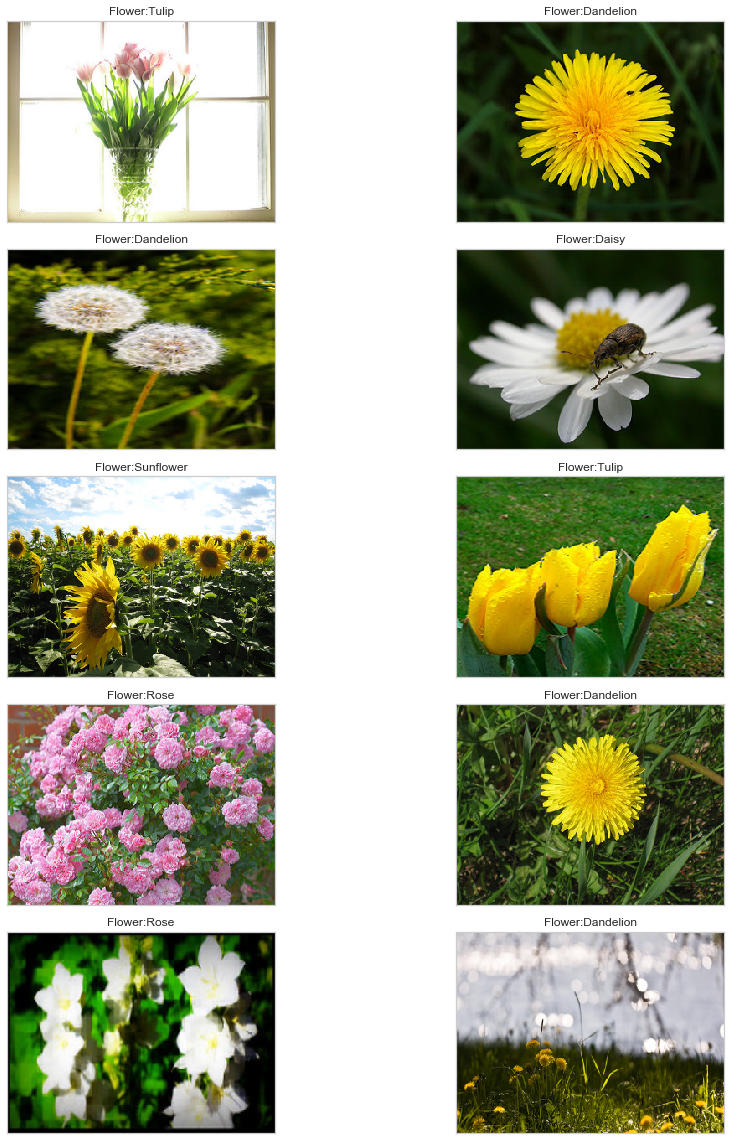

In [5]:
plt.figure(figsize=(16,16))
for i in range(1,11):
    plt.subplot(5,2,i,)
    i = np.random.randint(0,len(labels))
    plt.imshow(cv2.cvtColor(images[i],cv2.COLOR_RGB2BGR))
    plt.xticks([]),plt.yticks([])
    plt.title('Flower:'+labels[i])
plt.tight_layout()
plt.show()

In [6]:
encoder=LabelEncoder()
labels_enc=encoder.fit_transform(labels)
labels_enc=to_categorical(labels_enc,num_classes=5)

images = np.array(images).astype('float32')/255
images.shape

MemoryError: Unable to allocate 3.71 GiB for an array with shape (4323, 240, 320, 3) and data type float32

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(images,labels_enc,test_size=0.4,random_state=100)

In [ ]:
x_train.shape

np.random.seed(34)
rn.seed(34)
tf.set_random_seed(34)

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (240,320,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 
model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(5, activation = "softmax"))

In [ ]:
# Instantiate KNN learning model(k=15)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model
knn.fit(x_train, y_train)

# Accuracy Score
accuracy_train = accuracy_score(y_train, knn.predict(x_train))
accuracy_test = accuracy_score(y_test, knn.predict(x_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
batch = 128

history = model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch),epochs=50,validation_data=(x_test,y_test),
                     callbacks=[EarlyStopping(monitor='val_accuracy',patience=3),ReduceLROnPlateau(patience=3,min_lr=1e-6)],steps_per_epoch=x_train.shape[0] // batch)

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
test_results = model.evaluate(x_test, y_test)
print("The model test accuracy is {}.".format(test_results[1]))

In [ ]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)